# Codigo de la figura 2.10: Modelo IF con inputs desde N1 hasta N2



# 0. Importar bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Definición de Funciones

## generar_spike_amplitud:
Función que genera y retorna una amplitud de spike aleatoria en el rango de 0.6 a 1.0.

### Retorna:
- Amplitud de spike generada aleatoriamente.

In [2]:
def generar_spike_amplitud():
    return np.random.uniform(0.6, 1.0)

# 2. Variables de entorno


- `v_reset = 0.0`: Potencial de reinicio después de un spike.
- `tau = 2.0`: Constante de tiempo de la neurona.
- `puntos_tiempo_spike = [2, 4, 6, 8, 10, 12, 14, 16]`: Lista de puntos de tiempo en los que se generarán spikes.
- `umbral = 1.0`: Umbral de disparo de la neurona.
- `retardo_despues_umbral = 0.01`: Retardo después de alcanzar el umbral antes de generar un spike.
- `t = np.linspace(0, 15, 1000)`: Espacio de tiempo de 0 a 15 con 1000 puntos para la simulación.
- `i = np.zeros_like(t)`: Array inicializado con ceros para representar la corriente de entrada en cada punto de tiempo.
- `spikes_tiempo = []`: Lista para almacenar los tiempos en los que se generan spikes.
- `spikes_amplitud = []`: Lista para almacenar las amplitudes de los spikes generados.
- `umbral_alcanzado_tiempo = []`: Lista para almacenar los tiempos en los que se alcanza el umbral.


In [3]:
v_reset = 0.0
tau = 2.0
puntos_tiempo_spike = [2, 4, 6, 8, 10, 12, 14, 16]
umbral = 1.0
retardo_despues_umbral = 0.008
t = np.linspace(0, 15, 1000)
i = np.zeros_like(t)
spikes_tiempo = []
spikes_amplitud = []
umbral_alcanzado_tiempo = []

# 3. Aplicación de Spikes en Puntos Especificados

- Generación de spikes en `puntos_tiempo_spike`.
- Ajuste de la corriente de entrada con amplitudes y tiempos de spike.
- Identificación de momentos cuando la corriente supera el umbral.
- Establecimiento en el umbral y retardo antes de reiniciar a cero.


In [4]:
for punto_spike in puntos_tiempo_spike:
    spike_amplitude = generar_spike_amplitud()
    idx_spike = np.argmin(np.abs(t - punto_spike))
    spikes_tiempo.append(t[idx_spike])
    spikes_amplitud.append(spike_amplitude)
    i[idx_spike:] += spike_amplitude * np.exp(-(t[idx_spike:] - punto_spike) / tau)
    idx_superan_umbral = np.where(i > umbral)[0]
    for idx in idx_superan_umbral:
        umbral_alcanzado_tiempo.append(t[idx])
        i[idx:] = umbral
        idx_cero = np.argmin(np.abs(t - (t[idx] + retardo_despues_umbral)))
        i[idx_cero:] = v_reset

# 3. Dibujo de los inputs de corriente (1) potencial de membrana (2) y outputs de corriente (3)

## 3.1. Despiking

Se realiza el despiking para reducir redundancias en `umbral_alcanzado_tiempo`:

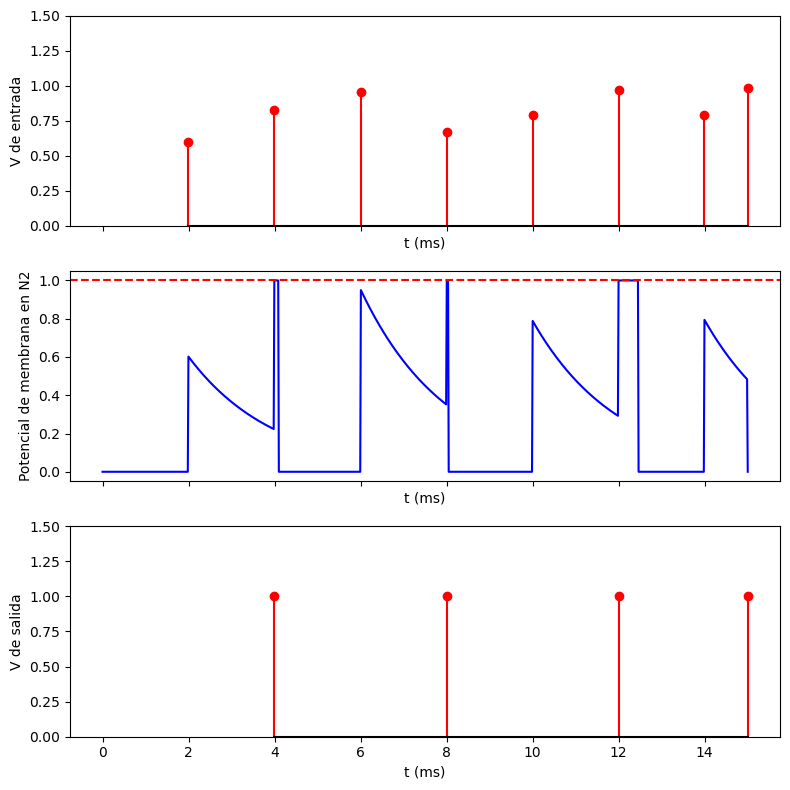

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(8, 8))
ax2.plot(t, i, label='Intensidad de Corriente con spikes y umbral', color='blue')
ax2.axhline(umbral, color='red', linestyle='--', label='Umbral')
ax1.stem(spikes_tiempo, spikes_amplitud, linefmt='r-', markerfmt='ro', basefmt='k-', label='Spikes')
ax1.set_ylim(0, 1.5)

# Despiking
umbral_alcanzado_tiempo_despike = []
for i in range(len(umbral_alcanzado_tiempo)):
    if i == 0 or umbral_alcanzado_tiempo[i] - umbral_alcanzado_tiempo[i-1] > 1:
        umbral_alcanzado_tiempo_despike.append(umbral_alcanzado_tiempo[i])

ax3.stem(umbral_alcanzado_tiempo_despike, [1]*len(umbral_alcanzado_tiempo_despike), linefmt='r-', markerfmt='ro', basefmt='k-', label='Outputs')
ax3.set_ylim(0, 1.5)
ax1.set_xlabel('t (ms)')
ax1.set_ylabel('V de entrada')
ax2.set_xlabel('t (ms)')
ax2.set_ylabel('Potencial de membrana en N2')
ax3.set_xlabel('t (ms)')
ax3.set_ylabel('V de salida')
fig.tight_layout()
plt.show()